In [1]:
# encoding: utf-8
import pandas as pd 
import matplotlib.pyplot as plt
from math import pow
import numpy as np

In [2]:
    R=[
        [5,0,3,0],
        [0,4,4,0],
        [3,5,3,0],
        [3,5,0,3]
    ]

In [3]:
def LFM(R,P,Q,K,steps=5000,learning_rate=0.0002,beta=0.02):
    Q=Q.T  # .T操作表示矩阵的转置
    result=[]
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    eij=R[i][j]-np.dot(P[i,:],Q[:,j]) # .dot(P,Q) 表示矩阵内积
                    for k in range(K):
                        P[i][k]=P[i][k]+learning_rate*(2*eij*Q[k][j]-beta*P[i][k])
                        Q[k][j]=Q[k][j]+learning_rate*(2*eij*P[i][k]-beta*Q[k][j])
        eR=np.dot(P,Q)
        e=0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    e=e+pow(R[i][j]-np.dot(P[i,:],Q[:,j]),2)
                    for k in range(K):
                        e=e+(beta/2)*(pow(P[i][k],2)+pow(Q[k][j],2))
#                         print("pow_p_q："+str(pow(P[i][k],2))+' and  '+str(pow(Q[k][j],2)))
        result.append(e)
        if e<0.001:
            break
    return P,Q.T,result

In [4]:
    R=np.array(R)

    N=len(R)
    M=len(R[0])
    K=2
P=np.random.rand(N,K)
Q=np.random.rand(M,K)

In [5]:
Q

array([[0.15460745, 0.69793539],
       [0.84262114, 0.92035939],
       [0.86988191, 0.91049144],
       [0.95426575, 0.59655359]])

原始的评分矩阵R为：
 [[5 0 3 0]
 [0 4 4 0]
 [3 5 3 0]
 [3 5 0 3]]
经过MF算法填充0处评分值后的评分矩阵R_MF为：
 [[4.8203222  4.64515601 3.23093687 2.70469153]
 [4.41560421 4.11508841 3.78217533 2.97829299]
 [3.07467108 4.95633991 2.9405741  2.77999882]
 [3.06593189 4.91348199 3.29919947 3.00366232]]


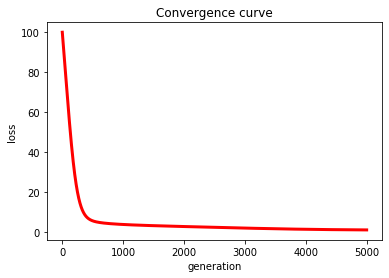

In [13]:
if __name__ == '__main__':
    R=[[5,0,3,0],
        [0,4,4,0],
        [3,5,3,0],
        [3,5,0,3]]

    R=np.array(R)

    N=len(R)
    M=len(R[0])
    K=3

    P=np.random.rand(N,K) #随机生成一个 N行 K列的矩阵
    Q=np.random.rand(M,K) #随机生成一个 M行 K列的矩阵

    nP,nQ,result=LFM(R,P,Q,K)
    print("原始的评分矩阵R为：\n",R)
    R_MF=np.dot(nP,nQ.T)
    print("经过MF算法填充0处评分值后的评分矩阵R_MF为：\n",R_MF)

#-------------损失函数的收敛曲线图---------------

    n=len(result)
    x=range(n)
    plt.plot(x,result,color='r',linewidth=3)
    plt.title("Convergence curve")
    plt.xlabel("generation")
    plt.ylabel("loss")
    plt.show()

In [14]:
P

array([[0.97997563, 1.74627089, 0.70242172],
       [0.69866443, 1.18059132, 1.55266209],
       [1.7073293 , 0.55487488, 0.61128273],
       [1.63404996, 0.36457999, 1.00248336]])

In [15]:
Q

array([[0.81456974, 1.8825002 , 1.04596481],
       [2.26286751, 1.05692547, 0.8284522 ],
       [0.967937  , 0.72371888, 1.45008753],
       [1.08941349, 0.52307211, 1.03024615]])

In [17]:
import numpy
nP =[
        [2,1,1],
        [3,0,1],
        [1,2,1],
        [0,0,1]
    ]
nP= numpy.array(nP)
nQ=[
        [2,1,-1],
        [0,1,1],
        [1,3,2],
        [0,2,1]
    ]
nQ= numpy.array(nQ)

In [18]:
R_MF=numpy.dot(nP.T,nQ)

In [19]:
R_MF

array([[5, 8, 3],
       [4, 7, 3],
       [3, 7, 3]])

In [20]:
nP.T

array([[2, 3, 1, 0],
       [1, 0, 2, 0],
       [1, 1, 1, 1]])

In [21]:
import numpy
nP =[
        [1.2,0.8],
        [1.4,0.9],
        [1.5,1],
        [1.2,0.8]
    ]
nP= numpy.array(nP)
nQ=[
        [1.5,1.2,1.,0.8],
        [1.7,0.6,1.1,0.4]
    ]
nQ= numpy.array(nQ)
R_MF=numpy.dot(nP,nQ)
R_MF

array([[3.16, 1.92, 2.08, 1.28],
       [3.63, 2.22, 2.39, 1.48],
       [3.95, 2.4 , 2.6 , 1.6 ],
       [3.16, 1.92, 2.08, 1.28]])